# Categories 

category_kmeans_v1 = {
    0: 'nightlife',
    1: 'beauty',
    2: 'coffee',
    3: 'services',
    4: 'shopping',
    5: 'restaurants'
}

category_kmeans_v2 = {
    0: 'restaurants',
    1: 'beauty',
    3: 'services',
    4: 'shopping'
}

In [154]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [3]:
df = pd.read_csv('yelp_philly.csv')

In [65]:
rows, columns = df.shape 

In [5]:
display(df.head(10))
print('------------------------------------------------------------------------------------')

display(df.sample(10))
print('------------------------------------------------------------------------------------')

display(df.tail(10))

,id,business_id,name,address,city,state,postal_code,latitude,longtitude,stars,review_count,is_open,attributes,categories,hours
0,4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,True,"{""WiFi"": ""u'free'"", ""Caters"": ""True"", ""Alcohol...","""Restaurants, Food, Bubble Tea, Coffee & Tea, ...","{""Friday"": ""7:0-21:0"", ""Monday"": ""7:0-20:0"", ""..."
1,16,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,True,"{""WiFi"": ""'free'"", ""HasTV"": ""False"", ""Alcohol""...","""Sushi Bars, Restaurants, Japanese""","{""Friday"": ""13:30-23:0"", ""Sunday"": ""13:30-22:0..."
2,20,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,True,"{""WiFi"": ""u'no'"", ""HasTV"": ""True"", ""Caters"": ""...","""Korean, Restaurants""","{""Friday"": ""11:30-20:30"", ""Monday"": ""11:30-20:..."
3,29,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,False,"{""WiFi"": ""u'free'"", ""HasTV"": ""True"", ""Music"": ...","""Cocktail Bars, Bars, Italian, Nightlife, Rest...","{""Friday"": ""12:0-2:0"", ""Monday"": ""16:0-0:0"", ""..."
4,32,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127.0,40.022466,-75.218314,3.0,41,False,"{""WiFi"": ""'no'"", ""HasTV"": ""True"", ""Caters"": ""F...","""Pizza, Restaurants, Salad, Soup""","{""Friday"": ""17:0-0:30"", ""Sunday"": ""17:0-21:30""..."
5,36,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123.0,39.962582,-75.135657,3.5,65,True,"{""HasTV"": ""True"", ""Ambience"": ""{'touristy': Fa...","""Eatertainment, Arts & Entertainment, Brewpubs...","{""Friday"": ""16:0-19:0"", ""Monday"": ""0:0-0:0"", ""..."
6,77,-4dYswJy7SPcbcERvitmIg,Pathmark,3021 Grays Ferry Ave,Philadelphia,PA,19146.0,39.940403,-75.193297,2.5,34,False,"{""BikeParking"": ""True"", ""BusinessParking"": ""{'...","""Food, Grocery""","{""Friday"": ""6:0-1:0"", ""Monday"": ""6:0-1:0"", ""Su..."
7,83,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,19104.0,39.954573,-75.194894,3.0,56,True,"{""WiFi"": ""u'free'"", ""HasTV"": ""True"", ""Caters"":...","""Restaurants, Automotive, Delis, Gas Stations,...","{""Friday"": ""0:0-0:0"", ""Monday"": ""0:0-0:0"", ""Su..."
8,85,eMjnw_7wp-CscyNh6Lu0ZA,AM&PM Locksmith,8540 Bustleton Ave,Philadelphia,PA,19152.0,40.072330,-75.048483,4.5,58,True,"{""ByAppointmentOnly"": ""True"", ""BusinessAccepts...","""Keys & Locksmiths, Home Services, Local Servi...","{""Friday"": ""6:0-3:0"", ""Monday"": ""6:0-3:0"", ""Su..."
9,116,xfmkEGiIERBaBMLhw-dTCg,Walmart Vision & Glasses,1675 S Christopher Columbus Blvd,Philadelphia,PA,19148.0,39.919809,-75.157803,4.5,6,True,"{""BusinessParking"": ""None"", ""RestaurantsPriceR...","""Eyewear & Opticians, Shopping""","{""Friday"": ""9:0-20:0"", ""Monday"": ""9:0-20:0"", ""..."


------------------------------------------------------------------------------------


,id,business_id,name,address,city,state,postal_code,latitude,longtitude,stars,review_count,is_open,attributes,categories,hours
416,4292,xruWHK8Z5N0JWyQubLHjgA,Potito's Italian American Pastries,1614 W Ritner St,Philadelphia,PA,19145.0,39.921022,-75.174431,3.5,88,True,"{""Caters"": ""True"", ""BikeParking"": ""True"", ""Bus...","""Food, Restaurants, Bakeries""","{""Friday"": ""7:0-20:0"", ""Sunday"": ""7:0-18:0"", ""..."
2643,26886,9KTR91LBbXrW-i_MWOB_mA,Reinhold Residential,117 N 15th St,Philadelphia,PA,19102.0,39.955152,-75.164532,4.5,7,True,"{""BusinessAcceptsCreditCards"": ""True""}","""Apartments, Home Services, Real Estate Servic...","{""Friday"": ""8:30-17:0"", ""Monday"": ""8:30-17:0"",..."
11873,122362,iEQwKldFFkrhUpikwF4VHw,A to Z Exotic Hardwoods,129 N 21st St,Philadelphia,PA,19103.0,39.956660,-75.174204,5.0,6,True,"{""ByAppointmentOnly"": ""False"", ""BusinessAccept...","""Home Services, Flooring, Contractors, Buildin...","{""Friday"": ""11:0-17:0"", ""Monday"": ""11:0-17:0"",..."
13599,140643,IY7cyEidmdGsxGzb2-gx5g,Mojo's Pizza,8107 Frankford Ave,Philadelphia,PA,19136.0,40.042241,-75.025108,3.0,23,False,"{""WiFi"": ""'no'"", ""HasTV"": ""True"", ""Alcohol"": ""...","""Pizza, Sandwiches, Restaurants, Chicken Wings""","{""Friday"": ""11:0-0:0"", ""Monday"": ""11:0-23:0"", ..."
135,1333,FeEYBozUzyVGisE3HPGbBg,Liz Clark Real Estate,2200 Walnut St,Philadelphia,PA,19103.0,39.950859,-75.177484,5.0,33,True,"{""ByAppointmentOnly"": ""True"", ""BusinessAccepts...","""Real Estate Agents, Real Estate Services, Hom...","{""Friday"": ""9:0-19:30"", ""Monday"": ""0:0-0:0"", ""..."
3896,40090,UQNQzgy32KycsODdErBUpw,Flat Iron,26 E Oregon Ave,Philadelphia,PA,19148.0,39.913575,-75.148706,3.0,22,False,"{""WiFi"": ""u'free'"", ""HasTV"": ""True"", ""Caters"":...","""Bars, Nightlife, Sports Bars, Beer, Wine & Sp...",NaN
10012,103303,TPXPScI9kvWsO2i08skxaA,Medusa Pizzeria,2327 Gaul St,Philadelphia,PA,19125.0,39.976974,-75.124114,4.0,122,False,"{""WiFi"": ""u'no'"", ""HasTV"": ""True"", ""Caters"": ""...","""Pizza, Italian, Sandwiches, Restaurants""","{""Friday"": ""16:0-22:0"", ""Sunday"": ""16:0-21:0"",..."
12283,126672,bK0j7YtVyN98UnM_8fUONg,Tavern on Broad,200 S Broad St,Philadelphia,PA,19102.0,39.949119,-75.164844,2.5,282,False,"{""WiFi"": ""u'free'"", ""HasTV"": ""True"", ""Music"": ...","""American (New), Bars, Sports Bars, Restaurant...","{""Friday"": ""11:0-2:0"", ""Monday"": ""11:0-2:0"", ""..."
4945,51100,6VPD2WrgtD8h5UzjqaUnFA,Delmonico's Steakhouse,4200 City Ave,Philadelphia,PA,19131.0,40.004379,-75.218198,3.0,49,False,"{""WiFi"": ""'paid'"", ""HasTV"": ""True"", ""Alcohol"":...","""Hotels & Travel, Restaurants, Event Planning ...","{""Friday"": ""17:0-22:0"", ""Monday"": ""17:0-22:0"",..."
12726,131461,D4JkGE1gin-jQr1E_Tn2Xg,Philadelphia Film Center,1412 Chestnut St,Philadelphia,PA,19102.0,39.950834,-75.164685,3.5,28,True,"{""WiFi"": ""u'no'"", ""HasTV"": ""False"", ""Music"": ""...","""Performing Arts, Nightlife, Arts & Entertainm...","{""Friday"": ""13:0-22:0"", ""Monday"": ""13:0-22:0"",..."


------------------------------------------------------------------------------------


,id,business_id,name,address,city,state,postal_code,latitude,longtitude,stars,review_count,is_open,attributes,categories,hours
14557,150288,VZbkSeZtFynEascotq7ExA,Ali Baba Magic Food,37TH And Walnut,Philadelphia,PA,19104.0,39.953391,-75.196765,4.0,8,False,"{""Alcohol"": ""u'none'"", ""GoodForKids"": ""False"",...","""Restaurants, Food Stands""",NaN
14558,150296,jsTHopAoQFncD0pGoJQFrw,St John Neumann Center for Rehabilitation & He...,10400 Roosevelt Blvd,Philadelphia,PA,19116.0,40.098009,-75.012998,1.5,6,True,NaN,"""Retirement Homes, Health & Medical, Hospice, ...",NaN
14559,150299,gPr1io7ks0Eo3FDsnDTYfg,Tata Cafe,7201 Germantown Ave,Philadelphia,PA,19119.0,40.060414,-75.191084,4.0,21,False,"{""WiFi"": ""u'free'"", ""HasTV"": ""True"", ""Alcohol""...","""Sandwiches, Restaurants, Italian""","{""Friday"": ""7:0-17:0"", ""Monday"": ""7:0-17:0"", ""..."
14560,150307,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,PA,19128.0,40.032483,-75.214430,3.0,55,True,"{""WiFi"": ""'no'"", ""HasTV"": ""True"", ""Caters"": ""T...","""Restaurants, Specialty Food, Food, Sandwiches...","{""Friday"": ""10:0-18:0"", ""Monday"": ""10:0-21:0"",..."
14561,150320,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104.0,39.951018,-75.198240,3.0,22,False,"{""WiFi"": ""u'free'"", ""HasTV"": ""True"", ""Alcohol""...","""Coffee & Tea, Food, Sandwiches, American (Tra...","{""Friday"": ""9:0-17:0"", ""Monday"": ""9:0-19:30"", ..."
14562,150321,wPAaAbFbq5wfLfW0gnYU7g,Intermix,1718 Walnut St,Philadelphia,PA,19103.0,39.950060,-75.170129,2.0,10,False,"{""BikeParking"": ""True"", ""BusinessParking"": ""{'...","""Fashion, Shopping, Women's Clothing""","{""Friday"": ""10:0-19:0"", ""Monday"": ""10:0-19:0"",..."
14563,150327,JDM7kiCEmeBc_5W-z6eZZw,2601 Parkway Apartments,2601 Pennsylvania Ave,Philadelphia,PA,19130.0,39.968806,-75.180608,3.0,6,True,"{""BusinessAcceptsCreditCards"": ""True""}","""Real Estate, Apartments, Home Services""",NaN
14564,150330,9U1Igcpe954LoWZRmNc-zg,Hand & Stone Massage And Facial Spa,"1100 S Columbus Blvd, Ste 24",Philadelphia,PA,19147.0,39.932756,-75.144504,3.0,32,True,"{""BikeParking"": ""True"", ""BusinessParking"": ""{'...","""Day Spas, Beauty & Spas, Skin Care, Massage""","{""Friday"": ""9:0-22:0"", ""Monday"": ""9:0-22:0"", ""..."
14565,150335,LJ4GjQ1HL6kqvIPpNUNNaQ,Shanti Yoga and Ayurveda,"1638 Pine St, Fl 1",Philadelphia,PA,19103.0,39.945966,-75.169666,4.5,39,True,"{""BikeParking"": ""None"", ""GoodForKids"": ""True"",...","""Health & Medical, Yoga, Shopping, Naturopathi...","{""Friday"": ""7:0-20:0"", ""Monday"": ""7:0-20:0"", ""..."
14566,150337,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147.0,39.935982,-75.158665,4.5,35,True,"{""WiFi"": ""u'free'"", ""HasTV"": ""True"", ""Caters"":...","""Restaurants, Mexican""","{""Friday"": ""11:0-2:0"", ""Monday"": ""11:0-22:0"", ..."


In [9]:
df['categories'] = df['categories'].apply(lambda x: str(x).replace('"', ''))

In [17]:
cats = df['categories']

In [47]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(cats)

# visualize tf_idf
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf_vectorizer.get_feature_names_out())
all_category_words = list(tfidf_df.columns)

In [184]:
all_category_words

['3d',
 'abatement',
 'acai',
 'accessories',
 'accountants',
 'acne',
 'active',
 'activities',
 'acupuncture',
 'addiction',
 'adjusters',
 'adoption',
 'adult',
 'advertising',
 'advising',
 'aerial',
 'aestheticians',
 'afghan',
 'african',
 'agencies',
 'agents',
 'air',
 'airlines',
 'airport',
 'airports',
 'allergists',
 'alterations',
 'alternative',
 'amateur',
 'american',
 'ammo',
 'amusement',
 'analysts',
 'and',
 'animal',
 'antiques',
 'apartment',
 'apartments',
 'appliances',
 'appraisal',
 'aquariums',
 'arabic',
 'arcades',
 'archery',
 'architects',
 'arenas',
 'argentine',
 'armenian',
 'art',
 'artists',
 'arts',
 'asian',
 'assembly',
 'assistance',
 'assistants',
 'assisted',
 'auction',
 'auctions',
 'audio',
 'audiologist',
 'australian',
 'austrian',
 'auto',
 'automation',
 'automotive',
 'axe',
 'baby',
 'badminton',
 'bagels',
 'bakeries',
 'balloon',
 'bangladeshi',
 'bankruptcy',
 'banks',
 'bar',
 'barbeque',
 'barbers',
 'barre',
 'bars',
 'bartenders

In [56]:
def k_means(k, n):  
    # fit 
    kmeans = KMeans(n_init=k, n_clusters=k)
    kmeans.fit(tfidf_matrix)
    
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1] # orderded
    
    # print out cluster results 
    for cluster in range(k):
        print('Cluster {}:'.format(cluster))

        for index in order_centroids[cluster, :n]: # just get the top n 
            print('   {}'.format(all_category_words[index]))
        print()

In [59]:
# k means test
for k in range(3,13):
    print('##### Test {} Clusters #####'.format(k))
    
    k_means(k, 3)

##### Test 3 Clusters #####
Cluster 0:
   food
   tea
   coffee

Cluster 1:
   services
   spas
   beauty

Cluster 2:
   restaurants
   bars
   pizza

##### Test 4 Clusters #####
Cluster 0:
   services
   home
   shopping

Cluster 1:
   food
   tea
   coffee

Cluster 2:
   spas
   beauty
   salons

Cluster 3:
   restaurants
   bars
   pizza

##### Test 5 Clusters #####
Cluster 0:
   restaurants
   pizza
   chinese

Cluster 1:
   bars
   nightlife
   restaurants

Cluster 2:
   services
   home
   shopping

Cluster 3:
   spas
   beauty
   salons

Cluster 4:
   food
   tea
   coffee

##### Test 6 Clusters #####
Cluster 0:
   services
   home
   shopping

Cluster 1:
   food
   tea
   coffee

Cluster 2:
   spas
   beauty
   salons

Cluster 3:
   restaurants
   pizza
   chinese

Cluster 4:
   brunch
   breakfast
   restaurants

Cluster 5:
   bars
   nightlife
   american

##### Test 7 Clusters #####
Cluster 0:
   spas
   beauty
   salons

Cluster 1:
   tea
   coffee
   food

Cluster 2:
   re

In [62]:
# testing cluster of 6
k = 6
n = 5
kmeans = KMeans(n_init=k, n_clusters=k)
kmeans.fit(tfidf_matrix)

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1] # orderded

# print out cluster results 
for cluster in range(k):
    print('Cluster {}:'.format(cluster))

    for index in order_centroids[cluster, :n]: # just get the top n 
        print('   {}'.format(all_category_words[index]))
    print()

Cluster 0:
   bars
   nightlife
   restaurants
   american
   new

Cluster 1:
   spas
   beauty
   salons
   hair
   nail

Cluster 2:
   food
   tea
   coffee
   restaurants
   bakeries

Cluster 3:
   services
   home
   medical
   local
   automotive

Cluster 4:
   shopping
   stores
   fashion
   arts
   clothing

Cluster 5:
   restaurants
   pizza
   chinese
   american
   italian



In [87]:
# my interpretation
categories = {
    0: 'nightlife',
    1: 'beauty',
    2: 'coffee',
    3: 'services',
    4: 'shopping',
    5: 'restaurants'
}

cat_i = np.zeros(rows)

cluster_labels = kmeans.predict(tfidf_matrix)

for i, cat in categories.items():
    indices = np.where(cluster_labels == i)[0]
    for ind, j in enumerate(indices):
        cat_i[j] = i

In [89]:
dfc = df.copy() 
dfc['category_kmeans_v1'] = cat_i

In [92]:
dfc[['categories', 'category_kmeans_v1']].sample(20)

,categories,category_kmeans_v1
10724,"Beauty & Spas, Makeup Artists",1.0
1,"Sushi Bars, Restaurants, Japanese",0.0
9514,"Body Shops, Automotive, Auto Repair",3.0
14290,"Restaurants, Chinese",5.0
1933,"Real Estate, Home Services, Apartments",3.0
11376,"Fast Food, Restaurants, Burgers",2.0
1111,"Event Planning & Services, Venues & Event Spaces",3.0
10661,"Restaurants, Sandwiches, Cheesesteaks",5.0
2621,"Active Life, Parks",3.0
14192,"Local Services, Mobile Phone Repair, IT Servic...",3.0


In [127]:
display(dfc[['category_kmeans_v1']].value_counts())
display(dfc[['category_kmeans_v1']].value_counts(normalize=True))

category_kmeans_v1
3.0                   4784
2.0                   2794
5.0                   2763
4.0                   1684
0.0                   1405
1.0                   1137
Name: count, dtype: int64

category_kmeans_v1
3.0                   0.328414
2.0                   0.191803
5.0                   0.189675
4.0                   0.115604
0.0                   0.096451
1.0                   0.078053
Name: proportion, dtype: float64

In [168]:
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)

components_arr = svd.fit_transform(tfidf_matrix)
components_df = pd.DataFrame(components_arr)

In [164]:
# components_df.columns = ['p1', 'p2', 'p3', 'p4', 'p5']

In [169]:
components_df.head()

,0,1,2
0,0.389548,-0.002218,0.457807
1,0.273376,-0.008055,-0.234599
2,0.182652,-0.005504,-0.056164
3,0.396050,-0.011449,-0.428940
4,0.273438,-0.010028,-0.123660


In [155]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [156]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [170]:
agg_clust = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg_clust.fit(components_arr)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

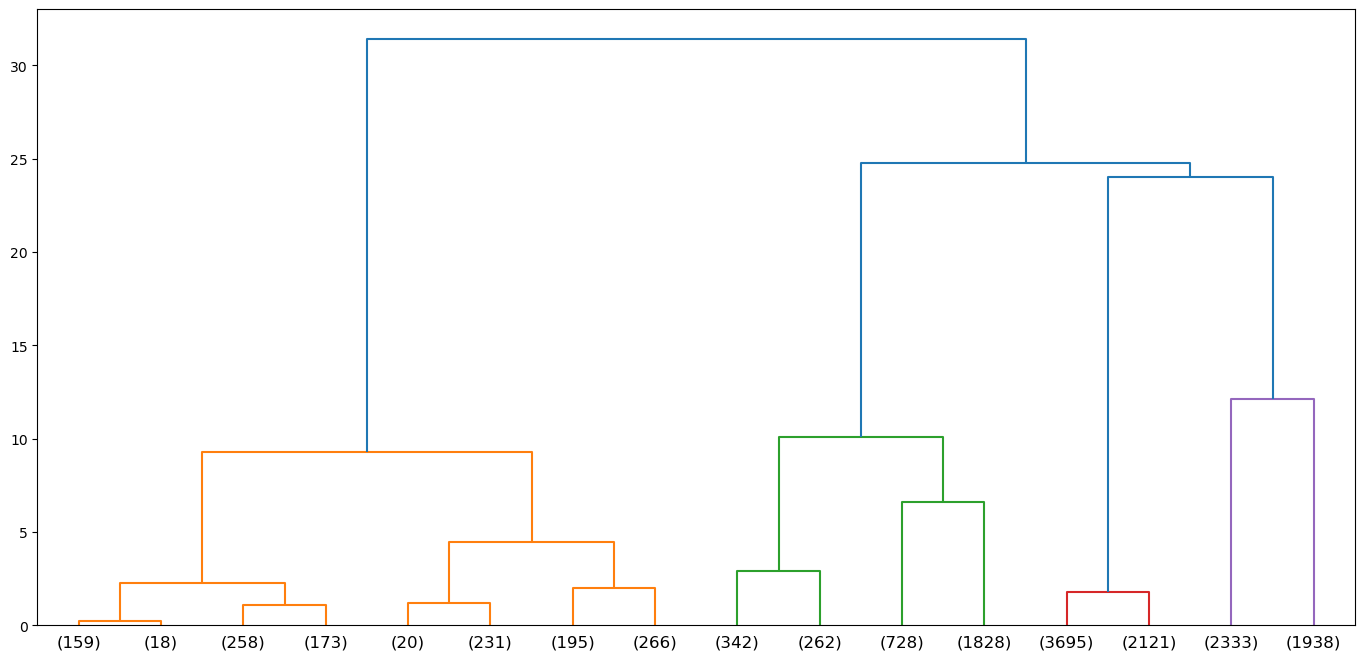

In [171]:
plt.figure(figsize=(17,8))
plot_dendrogram(agg_clust, truncate_mode="level", p=3)

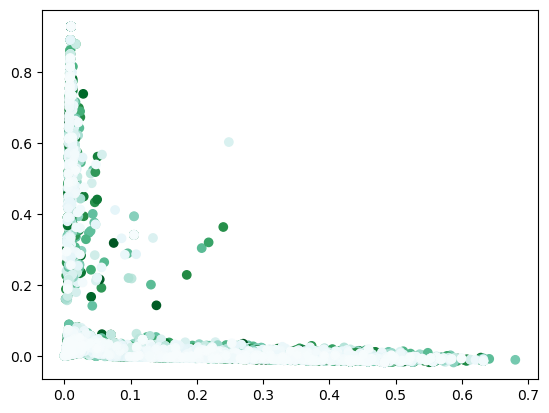

In [183]:
plt.scatter(components_df[0], components_df[1], c=agg_clust.fit_predict(components_arr), cmap='BuGn')

In [180]:
components_df[0]

0        0.389548
1        0.273376
2        0.182652
3        0.396050
4        0.273438
           ...   
14562    0.011916
14563    0.026582
14564    0.006706
14565    0.009686
14566    0.265895
Name: 0, Length: 14567, dtype: float64

In [130]:
# reprocess words 

In [133]:
dfv1 = pd.read_csv('yelp_philly.csv')
dfv1['categories'] = dfv1['categories'].apply(lambda x: str(x).replace('"', ''))

In [134]:
for 

0        Restaurants, Food, Bubble Tea, Coffee & Tea, B...
1                        Sushi Bars, Restaurants, Japanese
2                                      Korean, Restaurants
3        Cocktail Bars, Bars, Italian, Nightlife, Resta...
4                          Pizza, Restaurants, Salad, Soup
                               ...                        
14562                  Fashion, Shopping, Women's Clothing
14563               Real Estate, Apartments, Home Services
14564          Day Spas, Beauty & Spas, Skin Care, Massage
14565    Health & Medical, Yoga, Shopping, Naturopathic...
14566                                 Restaurants, Mexican
Name: categories, Length: 14567, dtype: object